In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from bayes_opt import BayesianOptimization

import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

In [2]:
all_train_data = pd.read_csv('train.csv')
all_test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
all_train_data.dropna(inplace=True)
all_test_data.dropna(inplace=True)

dropped_columns = ['GPA','year_graduated']
y_train = all_train_data['Best Performance']
X_train = all_train_data.drop('Best Performance',axis=1)

#read x_test
for col in dropped_columns:
    X_train = X_train.drop(col,axis=1)
X_test = all_test_data

for col in dropped_columns:
    X_test = X_test.drop(col,axis=1)


In [3]:
X_train.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
dtype: int64

In [4]:
X_train[:20]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,4,2,3,2,3,0,46.37,0.0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,4,4,3,0,0,1,47.68,0.0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,28,10,9,6,2,1,40.73,0.0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,29,11,6,0,4,10,47.42,0.0
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,30,9,8,2,3,0,47.18,0.0
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,level_1,28,7,9,4,0,0,48.46,0.0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,level_1,29,8,6,2,8,0,60.38,0.0
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,level_1,29,6,8,1,3,4,14.71,0.0
8,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,1,1989,Y,0,level_1,3,2,2,0,9,0,26.76,0.0
9,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,level_1,3,2,2,0,3,0,41.45,0.0


In [5]:
X_train['Achievement_above_100%_during3quartal'].value_counts()

0.0    7597
3.0    1604
1.0    1141
2.0     810
Name: Achievement_above_100%_during3quartal, dtype: int64

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11152 entries, 0 to 11152
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11152 non-null  object 
 1   job_duration_in_current_job_level      11152 non-null  float64
 2   person_level                           11152 non-null  object 
 3   job_duration_in_current_person_level   11152 non-null  float64
 4   job_duration_in_current_branch         11152 non-null  float64
 5   Employee_type                          11152 non-null  object 
 6   gender                                 11152 non-null  int64  
 7   age                                    11152 non-null  int64  
 8   marital_status_maried(Y/N)             11152 non-null  object 
 9   number_of_dependences                  11152 non-null  int64  
 10  Education_level                        11152 non-null  object 
 11  jo

In [112]:
tahun = 2020
X_train['age'] = tahun - X_train['age']
X_test['age'] = tahun - X_test['age']


In [113]:
X_train['age'].value_counts()

32    1558
33    1473
34    1348
31    1323
35     954
30     926
36     654
29     510
37     472
38     286
39     240
40     228
28     192
41     154
42     121
43      92
44      73
45      55
27      55
46      47
47      45
52      44
51      41
50      38
49      38
53      35
48      35
56      29
55      27
54      25
26      16
25       7
57       6
24       4
23       1
Name: age, dtype: int64

## data with numerical values

In [114]:
# data contain values
cont_col=[col for col in X_train.columns if X_train[col].dtype!='O']
cont_col_test=[col for col in X_test.columns if X_test[col].dtype!='O']
cont_col

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'gender',
 'age',
 'number_of_dependences',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal']

### categorical data (object)

In [115]:
# data contain category
cat_col=[col for col in X_train.columns if X_train[col].dtype=='O']
cat_col_test=[col for col in X_test.columns if X_test[col].dtype=='O']
cat_col_test

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

In [116]:
categorical=X_train[cat_col]
categorical_test=X_test[cat_col_test]
categorical.head()

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
0,JG04,PG03,RM_type_A,Y,level_0
1,JG04,PG03,RM_type_A,Y,level_1
2,JG05,PG06,RM_type_C,Y,level_1
3,JG05,PG06,RM_type_A,Y,level_1
4,JG05,PG06,RM_type_A,Y,level_1


In [117]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))
print('---------------------------')
for feature in categorical_test.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical_test[feature].value_counts())))

job_level has total 3 categories 

person_level has total 8 categories 

Employee_type has total 3 categories 

marital_status_maried(Y/N) has total 2 categories 

Education_level has total 6 categories 

---------------------------
job_level has total 4 categories 

person_level has total 7 categories 

Employee_type has total 3 categories 

marital_status_maried(Y/N) has total 2 categories 

Education_level has total 6 categories 



In [118]:
categorical['job_level'].value_counts()

JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

In [119]:
categorical_test['job_level'].value_counts()

JG04    5616
JG05     372
JG03      11
JG06       1
Name: job_level, dtype: int64

In [120]:
categorical['person_level'].value_counts()

PG03    9654
PG04     757
PG06     378
PG05     308
PG07      19
PG01      19
PG02      16
PG08       1
Name: person_level, dtype: int64

In [121]:
categorical_test['person_level'].value_counts()

PG03    5211
PG04     403
PG06     203
PG05     159
PG07      13
PG01       6
PG02       5
Name: person_level, dtype: int64

In [122]:
categorical['marital_status_maried(Y/N)'].value_counts()

Y    9501
N    1651
Name: marital_status_maried(Y/N), dtype: int64

In [123]:
categorical['Education_level'].value_counts()

level_4    9222
level_3    1742
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [124]:
# categorical['marital_status_maried(Y/N)'].unique()

In [125]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ['job_level', 'person_level', 'Employee_type', 'marital_status_maried(Y/N)','Education_level']:
    categorical[i]=encoder.fit_transform(categorical[i])
    categorical_test[i]=encoder.fit_transform(categorical_test[i])

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [126]:
categorical.head()

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
0,1,2,0,1,0
1,1,2,0,1,1
2,2,5,2,1,1
3,2,5,0,1,1
4,2,5,0,1,1


In [127]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

# Scaler

### int data

In [128]:
int_col=[col for col in X_train.columns if X_train[col].dtype=='int64']
int_col_test=[col for col in X_test.columns if X_test[col].dtype=='int64']

In [129]:
# int_data = pd.DataFrame()
int_data = X_train[int_col]
# int_data_test = pd.DataFrame()
int_data_test = X_test[int_col_test]

In [130]:
X_train[int_col]

,gender,age,number_of_dependences,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves
0,2,35,1,4,2,3,2,3,0
1,2,31,0,4,4,3,0,0,1
2,1,50,1,28,10,9,6,2,1
3,2,53,2,29,11,6,0,4,10
4,2,55,3,30,9,8,2,3,0
...,...,...,...,...,...,...,...,...,...
11148,2,34,1,4,3,3,0,4,1
11149,1,32,2,3,1,2,0,6,0
11150,2,29,0,2,1,2,0,4,0
11151,1,33,1,5,5,4,0,4,1


### float data

In [131]:
float_col=[col for col in X_train.columns if X_train[col].dtype=='float64']
float_col_test=[col for col in X_test.columns if X_test[col].dtype=='float64']

In [132]:
float_col

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal']

In [133]:
X_train[float_col]

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Last_achievement_%,Achievement_above_100%_during3quartal
0,1.352775,1.352775,1.732051,46.37,0.0
1,1.292285,1.292285,1.039230,47.68,0.0
2,2.565151,2.308679,1.780449,40.73,0.0
3,2.828427,1.000000,1.385641,47.42,0.0
4,2.828427,2.828427,0.707107,47.18,0.0
...,...,...,...,...,...
11148,1.256981,1.256981,1.224745,50.87,0.0
11149,1.385641,1.385641,1.802776,79.91,0.0
11150,1.256981,1.256981,1.385641,78.38,0.0
11151,1.118034,1.118034,0.000000,85.94,1.0


In [134]:
scaler = MinMaxScaler()
X_float_scale = scaler.fit_transform(X_train[float_col])
X_float_scale_test = scaler.fit_transform(X_test[float_col_test])

In [135]:
# X_scale_train = pd.DataFrame()
X_scale_train[float_col] = pd.DataFrame(X_float_scale)
# X_scale_test = pd.DataFrame()
X_scale_test[float_col_test] = pd.DataFrame(X_float_scale_test)

# Feature Concate

In [136]:
categorical

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
0,1,2,0,1,0
1,1,2,0,1,1
2,2,5,2,1,1
3,2,5,0,1,1
4,2,5,0,1,1
...,...,...,...,...,...
11148,1,2,0,1,5
11149,1,2,1,1,5
11150,1,2,1,1,5
11151,1,2,0,1,5


In [137]:
int_data

,gender,age,number_of_dependences,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves
0,2,35,1,4,2,3,2,3,0
1,2,31,0,4,4,3,0,0,1
2,1,50,1,28,10,9,6,2,1
3,2,53,2,29,11,6,0,4,10
4,2,55,3,30,9,8,2,3,0
...,...,...,...,...,...,...,...,...,...
11148,2,34,1,4,3,3,0,4,1
11149,1,32,2,3,1,2,0,6,0
11150,2,29,0,2,1,2,0,4,0
11151,1,33,1,5,5,4,0,4,1


In [138]:
X_scale_train

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Last_achievement_%,Achievement_above_100%_during3quartal
0,0.457321,0.478278,0.646846,0.333572,0.000000
1,0.436872,0.456892,0.388108,0.344011,0.000000
2,0.867179,0.816241,0.664921,0.288629,0.000000
3,0.956183,0.353553,0.517477,0.341940,0.000000
4,0.956183,1.000000,0.264074,0.340027,0.000000
...,...,...,...,...,...
11147,0.424937,0.444410,0.457389,0.369432,0.000000
11148,0.468432,0.489898,0.673259,0.600845,0.000000
11149,0.424937,0.444410,0.517477,0.588652,0.000000
11150,0.377964,0.395285,0.000000,0.648896,0.333333


In [158]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

categorical.reset_index(drop=True, inplace=True)
X_train[int_col].reset_index(drop=True, inplace=True)
X_scale_train[float_col].reset_index(drop=True, inplace=True)
#concat with normal data
# X_train_full=pd.concat([categorical,X_train[cont_col]],axis=1,join='inner')
# X_test_full=pd.concat([categorical_test,X_test[cont_col_test]],axis=1,join='inner')
# X_train_full.info()

#concat with data scaler
X_train_full=pd.concat([categorical,X_train[int_col],X_scale_train[float_col]],axis=1,join='inner')
X_test_full=pd.concat([categorical_test,X_test[int_col_test],X_scale_test[float_col_test]],axis=1,join='inner')

# X_test_full.head()
X_train_full


,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,1,2,0,1,0,1.352775,1.352775,1.732051,2,35,1,4,2,3,2,3,0,46.37,0.0
1,1,2,0,1,1,1.292285,1.292285,1.039230,2,31,0,4,4,3,0,0,1,47.68,0.0
2,2,5,2,1,1,2.565151,2.308679,1.780449,1,50,1,28,10,9,6,2,1,40.73,0.0
3,2,5,0,1,1,2.828427,1.000000,1.385641,2,53,2,29,11,6,0,4,10,47.42,0.0
4,2,5,0,1,1,2.828427,2.828427,0.707107,2,55,3,30,9,8,2,3,0,47.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,1,2,0,1,5,1.385641,1.385641,0.707107,2,35,1,6,3,3,0,3,0,82.39,0.0
11148,1,2,1,1,5,1.256981,1.256981,1.224745,2,34,1,4,3,3,0,4,1,50.87,0.0
11149,1,2,1,1,5,1.385641,1.385641,1.802776,1,32,2,3,1,2,0,6,0,79.91,0.0
11150,1,2,0,1,5,1.256981,1.256981,1.385641,2,29,0,2,1,2,0,4,0,78.38,0.0


In [159]:
cate_features_index = np.where(X_train_full.dtypes != float)[0] 
cate_features_index

array([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [167]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11151 entries, 0 to 11151
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11151 non-null  int32  
 1   person_level                           11151 non-null  int32  
 2   Employee_type                          11151 non-null  int32  
 3   marital_status_maried(Y/N)             11151 non-null  int32  
 4   Education_level                        11151 non-null  int32  
 5   job_duration_in_current_job_level      11151 non-null  float64
 6   job_duration_in_current_person_level   11151 non-null  float64
 7   job_duration_in_current_branch         11151 non-null  float64
 8   gender                                 11151 non-null  int64  
 9   age                                    11151 non-null  int64  
 10  number_of_dependences                  11151 non-null  int64  
 11  jo

In [168]:
y_train_full = y_train[:-1]

# Feature Correlation

[0.0075603  0.01933599 0.03045682 0.01598122 0.02720485 0.07524752
 0.07721126 0.07992191 0.01417163 0.08899371 0.04886409 0.06904462
 0.06304752 0.05686674 0.05302226 0.08292969 0.06619985 0.10138484
 0.0225552 ]


C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


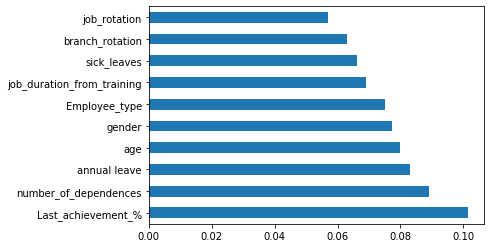

In [169]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_full,y_train_full)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [144]:
num_feats= len(X_train_full.columns)
print(num_feats)

19


In [145]:
# drop_column(X_train,'job_level')
# drop_column(X_train,'person_level')
# drop_column(X_train,'marital_status_maried(Y/N)')
# drop_column(X_train,'Employee_type')
# drop_column(X_train,'Achievement_above_100%_during3quartal')
# drop_column(X_train,'Education_level')

# drop_column(X_test,'job_level')
# drop_column(X_test,'person_level')
# drop_column(X_test,'marital_status_maried(Y/N)')
# drop_column(X_test,'Employee_type')
# drop_column(X_test,'Achievement_above_100%_during3quartal')
# drop_column(X_test,'Education_level')

In [146]:
# cat_columns = ['job_level', 'person_level', 'Employee_type', 'marital_status_maried(Y/N)', 'Education_level', 'Employee_type']
# for cat in cat_columns:
#     labelencoder = LabelEncoder()
#     X_train_[cat] = labelencoder.fit_transform(X_train_[cat].astype(str))
#     X_test_[cat] = labelencoder.transform(X_test_[cat].astype(str))       
    

In [147]:

#split x_train and x_val
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=38)


In [170]:
X_train_

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level,gender,age,number_of_dependences,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Last_achievement_%,Achievement_above_100%_during3quartal
9630,1,2,1,0,4,1,32,2,2,1,2,0,3,0,0.389872,0.407738,0.457389,0.068531,0.000000
5422,1,2,0,1,4,2,33,1,6,3,4,3,0,0,0.525901,0.550000,0.457389,0.582835,0.000000
2658,1,2,2,1,4,1,32,0,5,3,2,0,6,2,0.377964,0.395285,0.264074,0.327277,0.000000
3330,1,2,0,0,4,1,33,1,6,3,4,0,2,5,0.507093,0.530330,0.457389,0.815762,0.666667
5239,1,2,0,1,4,2,38,1,6,3,4,0,1,0,0.447214,0.467707,0.264074,0.560762,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,1,2,0,1,4,2,43,3,16,7,7,22,9,0,0.525901,0.550000,0.457389,0.606742,0.000000
10978,1,2,0,1,4,1,53,3,30,14,9,0,2,0,0.457321,0.478278,0.153980,0.704120,0.333333
5379,1,2,0,1,4,2,31,0,3,2,2,0,8,2,0.468432,0.489898,0.590487,0.723325,0.333333
4413,1,2,0,1,4,1,34,0,6,3,5,2,7,1,0.447214,0.467707,0.264074,0.484660,0.000000


# CatBoost

In [171]:

from catboost import Pool, CatBoostClassifier, cv


In [178]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11151 entries, 0 to 11151
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11151 non-null  int32  
 1   person_level                           11151 non-null  int32  
 2   Employee_type                          11151 non-null  int32  
 3   marital_status_maried(Y/N)             11151 non-null  int32  
 4   Education_level                        11151 non-null  int32  
 5   job_duration_in_current_job_level      11151 non-null  float64
 6   job_duration_in_current_person_level   11151 non-null  float64
 7   job_duration_in_current_branch         11151 non-null  float64
 8   gender                                 11151 non-null  int64  
 9   age                                    11151 non-null  int64  
 10  number_of_dependences                  11151 non-null  int64  
 11  jo

In [179]:
cate_features_index

array([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [180]:
model = CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)

In [185]:
X_train_

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level,gender,age,number_of_dependences,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,Last_achievement_%,Achievement_above_100%_during3quartal
9630,1,2,1,0,4,1,32,2,2,1,2,0,3,0,0.389872,0.407738,0.457389,0.068531,0.000000
5422,1,2,0,1,4,2,33,1,6,3,4,3,0,0,0.525901,0.550000,0.457389,0.582835,0.000000
2658,1,2,2,1,4,1,32,0,5,3,2,0,6,2,0.377964,0.395285,0.264074,0.327277,0.000000
3330,1,2,0,0,4,1,33,1,6,3,4,0,2,5,0.507093,0.530330,0.457389,0.815762,0.666667
5239,1,2,0,1,4,2,38,1,6,3,4,0,1,0,0.447214,0.467707,0.264074,0.560762,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,1,2,0,1,4,2,43,3,16,7,7,22,9,0,0.525901,0.550000,0.457389,0.606742,0.000000
10978,1,2,0,1,4,1,53,3,30,14,9,0,2,0,0.457321,0.478278,0.153980,0.704120,0.333333
5379,1,2,0,1,4,2,31,0,3,2,2,0,8,2,0.468432,0.489898,0.590487,0.723325,0.333333
4413,1,2,0,1,4,1,34,0,6,3,5,2,7,1,0.447214,0.467707,0.264074,0.484660,0.000000


In [186]:
cate_features_index = np.where(X_train_.dtypes != float)[0] 


In [187]:
cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [ ]:
model.fit(X_train_, y_train_, cat_features=cate_features_index,eval_set=(X_test_, y_test_))


0:	test: 0.5083022	best: 0.5083022 (0)	total: 39.3ms	remaining: 58.9s
1:	test: 0.5227398	best: 0.5227398 (1)	total: 90.6ms	remaining: 1m 7s
2:	test: 0.5196769	best: 0.5227398 (1)	total: 115ms	remaining: 57.5s
3:	test: 0.5274145	best: 0.5274145 (3)	total: 145ms	remaining: 54.2s
4:	test: 0.5274145	best: 0.5274145 (3)	total: 156ms	remaining: 46.5s
5:	test: 0.5289733	best: 0.5289733 (5)	total: 196ms	remaining: 48.9s
6:	test: 0.5363776	best: 0.5363776 (6)	total: 236ms	remaining: 50.4s
7:	test: 0.5350831	best: 0.5363776 (6)	total: 281ms	remaining: 52.4s
8:	test: 0.5398782	best: 0.5398782 (8)	total: 303ms	remaining: 50.1s
9:	test: 0.5466409	best: 0.5466409 (9)	total: 355ms	remaining: 52.8s
10:	test: 0.5450910	best: 0.5466409 (9)	total: 374ms	remaining: 50.7s
11:	test: 0.5450910	best: 0.5466409 (9)	total: 383ms	remaining: 47.5s
12:	test: 0.5450605	best: 0.5466409 (9)	total: 397ms	remaining: 45.4s
13:	test: 0.5441538	best: 0.5466409 (9)	total: 425ms	remaining: 45.1s
14:	test: 0.5433523	best: 0.

118:	test: 0.5502114	best: 0.5558152 (37)	total: 3.22s	remaining: 37.4s
119:	test: 0.5501503	best: 0.5558152 (37)	total: 3.25s	remaining: 37.3s
120:	test: 0.5512401	best: 0.5558152 (37)	total: 3.3s	remaining: 37.6s
121:	test: 0.5525202	best: 0.5558152 (37)	total: 3.35s	remaining: 37.9s
122:	test: 0.5522889	best: 0.5558152 (37)	total: 3.39s	remaining: 37.9s
123:	test: 0.5522889	best: 0.5558152 (37)	total: 3.4s	remaining: 37.7s
124:	test: 0.5520625	best: 0.5558152 (37)	total: 3.42s	remaining: 37.7s
125:	test: 0.5522488	best: 0.5558152 (37)	total: 3.48s	remaining: 38s
126:	test: 0.5521942	best: 0.5558152 (37)	total: 3.51s	remaining: 38s
127:	test: 0.5521942	best: 0.5558152 (37)	total: 3.52s	remaining: 37.8s
128:	test: 0.5521942	best: 0.5558152 (37)	total: 3.54s	remaining: 37.6s
129:	test: 0.5521942	best: 0.5558152 (37)	total: 3.55s	remaining: 37.4s
130:	test: 0.5525507	best: 0.5558152 (37)	total: 3.6s	remaining: 37.6s
131:	test: 0.5502154	best: 0.5558152 (37)	total: 3.65s	remaining: 37.9s

238:	test: 0.5523989	best: 0.5558152 (37)	total: 6.98s	remaining: 36.8s
239:	test: 0.5523989	best: 0.5558152 (37)	total: 6.99s	remaining: 36.7s
240:	test: 0.5526800	best: 0.5558152 (37)	total: 7.03s	remaining: 36.7s
241:	test: 0.5518047	best: 0.5558152 (37)	total: 7.08s	remaining: 36.8s
242:	test: 0.5520649	best: 0.5558152 (37)	total: 7.13s	remaining: 36.9s
243:	test: 0.5517549	best: 0.5558152 (37)	total: 7.19s	remaining: 37s
244:	test: 0.5514256	best: 0.5558152 (37)	total: 7.24s	remaining: 37.1s
245:	test: 0.5510096	best: 0.5558152 (37)	total: 7.29s	remaining: 37.2s
246:	test: 0.5505599	best: 0.5558152 (37)	total: 7.33s	remaining: 37.2s
247:	test: 0.5507735	best: 0.5558152 (37)	total: 7.38s	remaining: 37.3s
248:	test: 0.5511156	best: 0.5558152 (37)	total: 7.43s	remaining: 37.3s
249:	test: 0.5511526	best: 0.5558152 (37)	total: 7.45s	remaining: 37.2s
250:	test: 0.5524230	best: 0.5558152 (37)	total: 7.49s	remaining: 37.3s
251:	test: 0.5524230	best: 0.5558152 (37)	total: 7.51s	remaining: 

352:	test: 0.5581040	best: 0.5583738 (351)	total: 11.8s	remaining: 38.2s
353:	test: 0.5595495	best: 0.5595495 (353)	total: 11.8s	remaining: 38.2s
354:	test: 0.5592716	best: 0.5595495 (353)	total: 11.9s	remaining: 38.3s
355:	test: 0.5592716	best: 0.5595495 (353)	total: 11.9s	remaining: 38.2s
356:	test: 0.5591994	best: 0.5595495 (353)	total: 11.9s	remaining: 38.2s
357:	test: 0.5597246	best: 0.5597246 (357)	total: 12s	remaining: 38.2s
358:	test: 0.5594467	best: 0.5597246 (357)	total: 12s	remaining: 38.3s
359:	test: 0.5600185	best: 0.5600185 (359)	total: 12.1s	remaining: 38.3s
360:	test: 0.5598723	best: 0.5600185 (359)	total: 12.1s	remaining: 38.3s
361:	test: 0.5598161	best: 0.5600185 (359)	total: 12.2s	remaining: 38.4s
362:	test: 0.5597342	best: 0.5600185 (359)	total: 12.3s	remaining: 38.4s
363:	test: 0.5599221	best: 0.5600185 (359)	total: 12.3s	remaining: 38.4s
364:	test: 0.5599816	best: 0.5600185 (359)	total: 12.4s	remaining: 38.4s
365:	test: 0.5603510	best: 0.5603510 (365)	total: 12.4s

469:	test: 0.5611685	best: 0.5636725 (433)	total: 17.2s	remaining: 37.7s
470:	test: 0.5611685	best: 0.5636725 (433)	total: 17.2s	remaining: 37.7s
471:	test: 0.5608730	best: 0.5636725 (433)	total: 17.3s	remaining: 37.6s
472:	test: 0.5609934	best: 0.5636725 (433)	total: 17.3s	remaining: 37.6s
473:	test: 0.5612504	best: 0.5636725 (433)	total: 17.4s	remaining: 37.6s
474:	test: 0.5612167	best: 0.5636725 (433)	total: 17.4s	remaining: 37.6s
475:	test: 0.5614255	best: 0.5636725 (433)	total: 17.5s	remaining: 37.6s
476:	test: 0.5613725	best: 0.5636725 (433)	total: 17.5s	remaining: 37.6s
477:	test: 0.5612777	best: 0.5636725 (433)	total: 17.5s	remaining: 37.5s
478:	test: 0.5612938	best: 0.5636725 (433)	total: 17.6s	remaining: 37.4s
479:	test: 0.5614769	best: 0.5636725 (433)	total: 17.6s	remaining: 37.4s
480:	test: 0.5615925	best: 0.5636725 (433)	total: 17.7s	remaining: 37.5s
481:	test: 0.5615524	best: 0.5636725 (433)	total: 17.7s	remaining: 37.5s
482:	test: 0.5615476	best: 0.5636725 (433)	total: 1

586:	test: 0.5617387	best: 0.5636725 (433)	total: 22.4s	remaining: 34.8s
587:	test: 0.5616600	best: 0.5636725 (433)	total: 22.4s	remaining: 34.7s
588:	test: 0.5616760	best: 0.5636725 (433)	total: 22.4s	remaining: 34.7s
589:	test: 0.5615154	best: 0.5636725 (433)	total: 22.5s	remaining: 34.7s
590:	test: 0.5615154	best: 0.5636725 (433)	total: 22.5s	remaining: 34.6s
591:	test: 0.5615154	best: 0.5636725 (433)	total: 22.5s	remaining: 34.5s
592:	test: 0.5624502	best: 0.5636725 (433)	total: 22.6s	remaining: 34.5s
593:	test: 0.5628550	best: 0.5636725 (433)	total: 22.6s	remaining: 34.5s
594:	test: 0.5627843	best: 0.5636725 (433)	total: 22.7s	remaining: 34.5s
595:	test: 0.5628646	best: 0.5636725 (433)	total: 22.7s	remaining: 34.5s
596:	test: 0.5632388	best: 0.5636725 (433)	total: 22.8s	remaining: 34.4s
597:	test: 0.5633545	best: 0.5636725 (433)	total: 22.8s	remaining: 34.4s
598:	test: 0.5627763	best: 0.5636725 (433)	total: 22.9s	remaining: 34.4s
599:	test: 0.5629851	best: 0.5636725 (433)	total: 2

704:	test: 0.5611075	best: 0.5647261 (625)	total: 27.7s	remaining: 31.2s
705:	test: 0.5610770	best: 0.5647261 (625)	total: 27.7s	remaining: 31.2s
706:	test: 0.5610127	best: 0.5647261 (625)	total: 27.8s	remaining: 31.1s
707:	test: 0.5607525	best: 0.5647261 (625)	total: 27.8s	remaining: 31.1s
708:	test: 0.5606786	best: 0.5647261 (625)	total: 27.9s	remaining: 31.1s
709:	test: 0.5605228	best: 0.5647261 (625)	total: 27.9s	remaining: 31.1s
710:	test: 0.5605244	best: 0.5647261 (625)	total: 28s	remaining: 31s
711:	test: 0.5602514	best: 0.5647261 (625)	total: 28s	remaining: 31s
712:	test: 0.5599013	best: 0.5647261 (625)	total: 28.1s	remaining: 31s
713:	test: 0.5602771	best: 0.5647261 (625)	total: 28.1s	remaining: 31s
714:	test: 0.5601743	best: 0.5647261 (625)	total: 28.2s	remaining: 30.9s
715:	test: 0.5603172	best: 0.5647261 (625)	total: 28.2s	remaining: 30.9s
716:	test: 0.5603172	best: 0.5647261 (625)	total: 28.2s	remaining: 30.8s
717:	test: 0.5600972	best: 0.5647261 (625)	total: 28.3s	remaini

819:	test: 0.5586709	best: 0.5647261 (625)	total: 33.1s	remaining: 27.5s
820:	test: 0.5586469	best: 0.5647261 (625)	total: 33.2s	remaining: 27.4s
821:	test: 0.5590131	best: 0.5647261 (625)	total: 33.2s	remaining: 27.4s
822:	test: 0.5591255	best: 0.5647261 (625)	total: 33.3s	remaining: 27.4s
823:	test: 0.5585874	best: 0.5647261 (625)	total: 33.3s	remaining: 27.3s
824:	test: 0.5586629	best: 0.5647261 (625)	total: 33.4s	remaining: 27.3s
825:	test: 0.5587448	best: 0.5647261 (625)	total: 33.4s	remaining: 27.3s
826:	test: 0.5590693	best: 0.5647261 (625)	total: 33.5s	remaining: 27.2s
827:	test: 0.5590082	best: 0.5647261 (625)	total: 33.5s	remaining: 27.2s
828:	test: 0.5591158	best: 0.5647261 (625)	total: 33.6s	remaining: 27.2s
829:	test: 0.5590404	best: 0.5647261 (625)	total: 33.6s	remaining: 27.1s
830:	test: 0.5592331	best: 0.5647261 (625)	total: 33.7s	remaining: 27.1s
831:	test: 0.5593327	best: 0.5647261 (625)	total: 33.7s	remaining: 27.1s
832:	test: 0.5592492	best: 0.5647261 (625)	total: 3

In [104]:
pred = model.predict_proba(X_test_full)
preds= pred[:,1]

In [105]:
preds

array([0.14828051, 0.15062473, 0.17246325, ..., 0.14177226, 0.12517802,
       0.13965862])

In [107]:
#generating submission csv
submission = pd.DataFrame(preds)
#save the file to your directory
submission.to_csv('test-catboost-norm.csv',index_label='index',header=['Best Perfomance'])

# LGBM

In [ ]:
class lgbm_target :
    def __init__(self, x_train, y_train, x_test, y_test) :
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
    def clean_param(self, param) :
        params = {'boosting_type':'gbdt', 'class_weight':None, 'colsample_bytree':1.0, 
                  'importance_type':'split', 'learning_rate':0.1,
                  'min_child_samples':2000, 'min_split_gain':0.0, 'n_estimators':10, 'objective':None,
                  'random_state':0, 'reg_alpha':0.0, 'reg_lambda':0.0, 'silent':True,
                  'subsample':1.0, 'subsample_for_bin':200000, 'subsample_freq':0}
        params['num_leaves'] = int(param['num_leaves'])
        params['min_child_weight'] = int(param['min_child_weight'])
        params['max_depth'] = int(param['max_depth'])
        params['learning_rate'] = 0.1
        params['min_data_in_bin'] = 1
        params['min_data'] = 1
        
        params['min_child_samples'] = int(param['min_child_samples'])
        params['bagging_fraction'] = param['bagging_fraction']
        params['lambda_l1'] = param['lambda_l1']
        params['lambda_l2'] = param['lambda_l2']

        return params
        
    def evaluate(self, min_child_weight, max_depth, num_leaves,
                min_child_samples, bagging_fraction, lambda_l1, lambda_l2):
        params = {'num_leaves':num_leaves, 
                  'min_child_weight':min_child_weight, 
                  'max_depth':max_depth,
                 'min_child_samples':min_child_samples,
                 'bagging_fraction' : bagging_fraction,
                 'lambda_l1' : lambda_l1,
                 'lambda_l2' : lambda_l2}
        
        params = self.clean_param(params)
        res=[]
        lgbm_model = lgb.LGBMClassifier(**params)
        lgbm_model.fit(self.x_train, self.y_train)
        y_pred = lgbm_model.predict_proba(self.x_test)
        predictions = y_pred[:,1]
        res.append(predictions)
        acc = roc_auc_score(self.y_test,predictions)
        print('######',acc)
        return acc


lt = lgbm_target(X_train_, y_train_, X_test_, y_test_)
lgbmBO = BayesianOptimization(lt.evaluate, {'min_child_weight': (0.01, 1),
                                              'max_depth': (7, 25),
                                              'num_leaves': (5, 50),
                                            'min_child_samples' :(10,50),
                                            'bagging_fraction' : (0.5,1),
                                            'lambda_l1' : (0,1),
                                            'lambda_l2' : (0,1)
                                           }, 
                             random_state=3)

lgbmBO.maximize(init_points=10, n_iter=55)

In [ ]:
b=lgbmBO.max['params']
print(b)

|   iter    |  target   | baggin... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_ch... | num_le... |

In [ ]:
params = {'min_child_weight': b['min_child_weight'],
              'max_depth': round(b['max_depth']),
              'num_leaves': round(b['num_leaves']),
            'min_child_samples' :round(b['min_child_samples']),
            'bagging_fraction' : b['bagging_fraction'],
            'lambda_l1' : b['lambda_l1'],
            'lambda_l2' : b['lambda_l2']
           }
model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train,y_train)
model_lgb.predict_proba(X_test)[:,1]
sample_submission['Best Performance'] = model_lgb.predict_proba(X_test)[:,1]
# sample_submission.to_csv('submission.csv')

In [ ]:
'''ADVERSARIAL VALIDATION'''
y_label_adv = np.zeros((X_train.shape[0]+ X_test.shape[0]))
y_label_adv[:X_train.shape[0]] = 1
adversarial_data = pd.concat((X_train,X_test))
# model_lgb = lgb.LGBMClassifier()
X_train_, X_test_, y_train_, y_test_ = train_test_split(adversarial_data, y_label_adv, test_size=0.33, random_state=38)

model_lgb.fit(X_train_,y_train_)
y_pred  = model_lgb.predict(X_test_)
roc_auc_score(y_pred,y_test_)

In [ ]:
'''0.55 acc'''
params = {'min_child_weight': 0.6715,
              'max_depth': 12,
              'num_leaves': 20,
            'min_child_samples' :24,
            'bagging_fraction' : 0.8538,
            'lambda_l1' : 0.7467,
            'lambda_l2' : 0.6911
           }
model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train,y_train)
model_lgb.predict_proba(X_test)[:,1]
sample_submission['Best Performance'] = model_lgb.predict_proba(X_test)[:,1]
# sample_submission.to_csv('submission.csv')

In [ ]:
'''0.55 acc-modified'''
params = {'min_child_weight': 0.5,
              'max_depth': 12,
              'num_leaves': 20,
            'min_child_samples' :24,
            'bagging_fraction' : 0.7,
            'lambda_l1' : 0.746,
            'lambda_l2' : 0.6
           }
model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train,y_train)
model_lgb.predict_proba(X_test)[:,1]
sample_submission['Best Performance'] = model_lgb.predict_proba(X_test)[:,1]
# sample_submission.to_csv('submission.csv')

In [ ]:
y_label_adv.shape

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('submission_54.csv', index=False)

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import cross_val_score
# fit model to training data
model = xgb.XGBRFClassifier(n_estimators=1000, random_state=1245)
# cross validation score
score = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
print("XGB ROC-AUC Mean Score: ", np.mean(score))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)

def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma, learning_rate):
    params = {
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':-1,
#     'booster':'dart'
    'booster':'gbtree'
     }
    
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    params['learning_rate'] = learning_rate
    scores = xgb.cv(params, dtrain, num_boost_round=500,verbose_eval=False, 
                    early_stopping_rounds=10, nfold=5)
    return scores['test-auc-mean'].iloc[-1]

In [ ]:
pds ={
  'min_child_weight':(3, 20),
  'gamma':(0, 10),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (2, 15),
  'learning_rate': (0.01, 0.5)
}

In [ ]:
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=1)
optimizer.maximize(init_points=5, n_iter=55)

In [ ]:
a = optimizer.max['params']

In [ ]:
round(a['min_child_weight'])

In [ ]:
params = {
    'colsample_bytree': a['colsample_bytree'],
 'gamma': a['gamma'],
 'learning_rate': a['learning_rate'],
 'max_depth': round(a['max_depth']),
 'min_child_weight': round(a['min_child_weight']),
 'subsample': a['subsample'],
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'n_jobs':-1
}

In [ ]:
xgbr =  xgb.XGBClassifier(**params, random_state=1245, nthread=-1)
score = cross_val_score(xgbr, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
print("XGB ROC-AUC Mean Score: ", np.mean(score))

In [ ]:

xgbr.fit(X_train, y_train)

In [ ]:
'''ADVERSARIAL VALIDATION'''
y_label_adv = np.zeros((X_train.shape[0]+ X_test.shape[0]))
y_label_adv[:X_train.shape[0]] = 1
adversarial_data = pd.concat((X_train,X_test))
# model_lgb = lgb.LGBMClassifier()
X_train_, X_test_, y_train_, y_test_ = train_test_split(adversarial_data, y_label_adv, test_size=0.33, random_state=38)

xgbr.fit(X_train_,y_train_)
y_pred  = model_lgb.predict(X_test_)
roc_auc_score(y_pred,y_test_)

In [ ]:
# Predict the probability using predict_proba
y_pred = xgbr.predict_proba(X_test)[:,1]

In [ ]:
y_pred

In [ ]:
#generating submission csv
submission = pd.DataFrame(y_pred)
#save the file to your directory
submission.to_csv('test-xgboost.csv',index_label='index',header=['value'])